<a href="https://colab.research.google.com/github/sanikanarmitwar/MusicGenreClassification/blob/main/musicgenreIMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from zipfile import ZipFile
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import librosa

In [2]:
from google.colab import files
uploaded = files.upload()

Saving images_original.zip to images_original.zip


In [3]:
# extracts the data from zip file and stores in directory extract_path
def extract_zip(zip_path, extract_path):
    with ZipFile(zip_path, 'r') as zip_ref: #opens zip file in read mode
        zip_ref.extractall(extract_path)

def display_images(folder_path):
    exts = ['.png']

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            directory_name = root.split('/')[-1]
            file_path = os.path.join(root, file)    #root stores current directory being traversed while file stores file name
            if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
                img = cv2.imread(file_path)
                # cv2_imshow(img)
# store zip file path in zipfile
file = "images_original.zip"
extfolder = "extracted_folder"

# extract the contents of the zip file
extract_zip(file, extfolder)

# display images in the extracted folder
display_images(extfolder)

(218, 336)


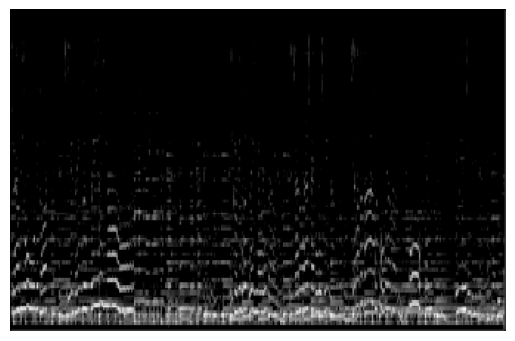

In [4]:
# extracting labels and cropping spectrogram images
y = []
exts = ['.png']
spectrogram = []

# Assuming extfolder is defined somewhere in your code
for root, dirs, files in os.walk(extfolder):
    for file in files:
        label = root.split('/')[-1]
        file_path = os.path.join(root, file)    # root stores current directory being traversed while file stores file name
        if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
            img = cv2.imread(file_path, 0)

            if img is None:
                print("Error loading image:", file_path)
                continue

            # Threshold the image to remove white borders and crop it
            _, binary = cv2.threshold(img, 254, 255, cv2.THRESH_BINARY_INV)
            kernel = np.ones((5,5), np.uint8)
            binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
            contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if contours:
                max_contour = max(contours, key=cv2.contourArea)
                x, k, w, h = cv2.boundingRect(max_contour)
                cropped_image = img[k:k+h, x:x+w]
            else:
                cropped_image = img

            # Add the cropped image to the spectrogram list
            spectrogram.append(cropped_image)

            # Append the label to the y list
            y.append(label)  # Convert label to string if necessary

# Display the shape of the 100th image in the spectrogram list
print(spectrogram[0].shape)

# Display the 100th image in the spectrogram list
plt.imshow(spectrogram[0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [5]:
linear_spectrogram = []
for image in spectrogram:
    image = image.astype(float)
    linear = librosa.feature.inverse.mel_to_stft(image) #  Inverse Mel transform
    linear_spectrogram.append(linear)

In [ ]:
# spectral bandwidth
mean_spectral_bandwidth = []
var_spectral_bandwidth = []
for image in linear_spectrogram:
    spectral_bandwidths = librosa.feature.spectral_bandwidth(S=image)
    mean = np.mean(spectral_bandwidths)
    mean_spectral_bandwidth.append(mean)

    var = np.var(spectral_bandwidths)
    var_spectral_bandwidth.append(var)
    print(mean)

In [ ]:
# spectral centroid
mean_spectral_centroid = []
var_spectral_centroid = []

for image in linear_spectrogram:
    spectral_centroid = librosa.feature.spectral_centroid(S=image)
    mean = np.mean(spectral_centroid)
    mean_spectral_centroid.append(mean)

    var = np.var(spectral_centroid)
    var_spectral_centroid.append(var)
    print(mean)

In [ ]:
# spectral contrast
mean_spectral_contrast = []
var_spectral_contrast = []

for image in linear_spectrogram:
    spectral_contrast = librosa.feature.spectral_contrast(S=image)
    mean = np.mean(spectral_contrast)
    mean_spectral_contrast.append(mean)

    var = np.var(spectral_contrast)
    var_spectral_contrast.append(var)
    print(mean)

In [ ]:
# spectral rolloff
mean_spectral_rolloff= []
var_spectral_rolloff= []

for image in linear_spectrogram:
    spectral_rolloff = librosa.feature.spectral_rolloff(S=image)
    mean = np.mean(spectral_rolloff)
    mean_spectral_rolloff.append(mean)

    var = np.var(spectral_rolloff)
    var_spectral_rolloff.append(var)

    print(mean)

In [ ]:
# mfcc
mean_mfcc= []
var_mfcc= []

for image in linear_spectrogram:
    mfcc = librosa.feature.mfcc(S=image, n_mfcc = 20)
    mean = np.mean(mfcc)
    mean_mfcc.append(mean)

    var = np.var(mfcc)
    var_mfcc.append(var)

    print(mean)

In [ ]:
# chroma
mean_chroma= []
var_chroma= []

for image in linear_spectrogram:
    chroma = librosa.feature.chroma_stft(S=image)
    mean = np.mean(chroma)
    mean_chroma.append(mean)

    var = np.var(chroma)
    var_chroma.append(var)

    print(mean)

In [ ]:
# root mean square
mean_rms = []
var_rms = []

for image in linear_spectrogram:
    waveform = librosa.griffinlim(image)
    hop_length = 512
    rms = librosa.feature.rms(y=waveform, hop_length=hop_length)

    mean = np.mean(rms)
    mean_rms.append(mean)

    var = np.var(rms)
    var_rms.append(var)
    print(mean)

In [ ]:
# zero crossing rate
mean_zcr = []
var_zcr = []

for image in linear_spectrogram:
    waveform = librosa.griffinlim(image)
    hop_length = 512
    zcr = librosa.feature.zero_crossing_rate(y=waveform, hop_length=hop_length)

    mean = np.mean(zcr)
    mean_zcr.append(mean)

    var = np.var(zcr)
    var_zcr.append(var)
    print(mean)

In [14]:
X = pd.DataFrame()
X['mean_spectral_bandwidth'] = mean_spectral_bandwidth
X['var_spectral_bandwidth'] = var_spectral_bandwidth
X['mean_spectral_centroid'] = mean_spectral_centroid
X['var_spectral_centroid'] = var_spectral_centroid
X['mean_spectral_contrast'] = mean_spectral_contrast
X['var_spectral_contrast'] = var_spectral_contrast
X['mean_spectral_rolloff'] = mean_spectral_rolloff
X['var_spectral_rolloff'] = var_spectral_rolloff
X['mean_mfcc'] = mean_mfcc
X['var_mfcc'] = var_mfcc
X['mean_chroma'] = mean_chroma
X['var_chroma'] = var_chroma
X['mean_rms'] = mean_rms
X['var_rms'] = var_rms
X['mean_zcr'] = mean_zcr
X['var_zcr'] = var_zcr
display(X)

,mean_spectral_bandwidth,var_spectral_bandwidth,mean_spectral_centroid,var_spectral_centroid,mean_spectral_contrast,var_spectral_contrast,mean_spectral_rolloff,var_spectral_rolloff,mean_mfcc,var_mfcc,mean_chroma,var_chroma,mean_rms,var_rms,mean_zcr,var_zcr
0,2065.663564,85949.877208,7745.551713,1.811779e+05,43.274301,1378.276637,9761.141968,26954.679703,4.355574,15830.684325,0.577969,0.067065,0.667662,0.002891,0.703785,0.002033
1,1810.115775,250624.031908,8323.152470,6.142123e+05,32.484574,1342.621052,10315.109253,60462.671360,4.619911,11653.869908,0.550658,0.091802,0.554200,0.007750,0.748715,0.004918
2,2787.972158,14684.771234,6534.615303,9.263097e+04,51.121816,1381.050486,9659.275818,43140.506109,9.386278,33476.210769,0.765733,0.023177,0.942324,0.002469,0.603242,0.001144
3,2096.774827,279571.599517,8039.805135,4.729527e+05,42.330146,1449.451738,10128.488159,36856.220579,5.848194,15074.929327,0.589889,0.072721,0.645765,0.007308,0.723778,0.004031
4,1221.069807,370173.082365,9129.613631,8.042568e+05,24.473280,1078.028258,10406.977844,99371.052550,2.297003,6204.511600,0.391759,0.113161,0.412375,0.012696,0.826509,0.006078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2341.059589,403114.341155,7463.132027,1.542255e+06,35.914867,1399.826131,10029.281616,196578.399902,8.604584,23090.560030,0.667117,0.074576,0.766852,0.024006,0.702446,0.009103
995,2695.143294,57488.235906,6609.703651,2.047828e+05,50.091026,1387.526991,9613.998413,102304.330682,11.022030,28956.327093,0.753992,0.028514,0.872873,0.014682,0.607880,0.001959
996,2813.649742,141197.678780,6309.919766,7.088902e+05,43.381134,1367.013119,9489.253235,474624.081196,8.215835,22681.730272,0.709315,0.057932,0.758857,0.027659,0.580048,0.005609
997,2333.113171,80928.735882,7465.239790,2.522238e+05,42.138946,1375.814614,9952.313232,43783.232309,9.006825,25212.672664,0.697731,0.044446,0.818444,0.010565,0.684810,0.002100


In [15]:
#train test split
X = np.array(X)
y = np.array(y)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_categorical = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# X_train = X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (799, 16)
Shape of y_train: (799,)
Shape of X_test: (200, 16)
Shape of y_test: (200,)


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(max_depth = 8)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy*100, "%")

Decision Tree Classifier Accuracy: 37.0 %


In [54]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Classifier Accuracy:", svm_accuracy*100, "%")

SVM Classifier Accuracy: 28.000000000000004 %


kNN Classifier Accuracy for k = 1 : 25.0 %
kNN Classifier Accuracy for k = 2 : 21.0 %
kNN Classifier Accuracy for k = 3 : 18.0 %
kNN Classifier Accuracy for k = 4 : 20.5 %
kNN Classifier Accuracy for k = 5 : 20.5 %
kNN Classifier Accuracy for k = 6 : 21.5 %
kNN Classifier Accuracy for k = 7 : 24.0 %
kNN Classifier Accuracy for k = 8 : 24.0 %
kNN Classifier Accuracy for k = 9 : 26.5 %
kNN Classifier Accuracy for k = 10 : 26.5 %
kNN Classifier Accuracy for k = 11 : 25.0 %
kNN Classifier Accuracy for k = 12 : 26.5 %
kNN Classifier Accuracy for k = 13 : 27.500000000000004 %
kNN Classifier Accuracy for k = 14 : 27.500000000000004 %
kNN Classifier Accuracy for k = 15 : 28.000000000000004 %
kNN Classifier Accuracy for k = 16 : 27.500000000000004 %
kNN Classifier Accuracy for k = 17 : 27.0 %
kNN Classifier Accuracy for k = 18 : 27.500000000000004 %
kNN Classifier Accuracy for k = 19 : 26.0 %
kNN Classifier Accuracy for k = 20 : 27.0 %
kNN Classifier Accuracy for k = 21 : 24.5 %
kNN Classifier 

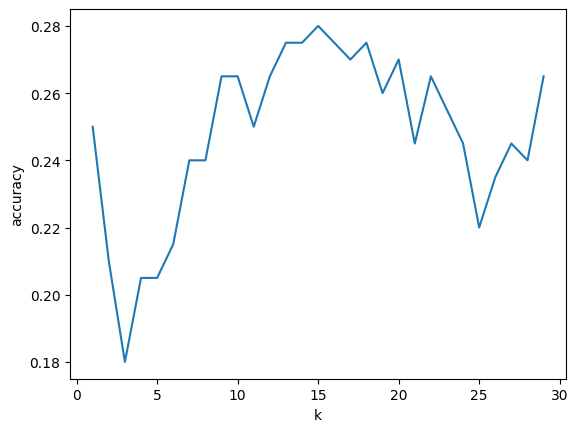

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_acc = []
for k in np.arange(1,30,1):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_pred = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    print("kNN Classifier Accuracy for k =",k, ":", knn_accuracy*100, "%")
    knn_acc.append(knn_accuracy)

xseq = np.linspace(1, 29, 29)
plt.plot(xseq, knn_acc)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

Random Forest Classifier Accuracy for n_estimators = 10 : 41.5 %
Random Forest Classifier Accuracy for n_estimators = 20 : 48.5 %
Random Forest Classifier Accuracy for n_estimators = 30 : 52.5 %
Random Forest Classifier Accuracy for n_estimators = 40 : 52.0 %
Random Forest Classifier Accuracy for n_estimators = 50 : 54.50000000000001 %
Random Forest Classifier Accuracy for n_estimators = 60 : 53.0 %
Random Forest Classifier Accuracy for n_estimators = 70 : 55.00000000000001 %
Random Forest Classifier Accuracy for n_estimators = 80 : 55.00000000000001 %
Random Forest Classifier Accuracy for n_estimators = 90 : 54.50000000000001 %
Random Forest Classifier Accuracy for n_estimators = 100 : 55.50000000000001 %
Random Forest Classifier Accuracy for n_estimators = 110 : 54.50000000000001 %


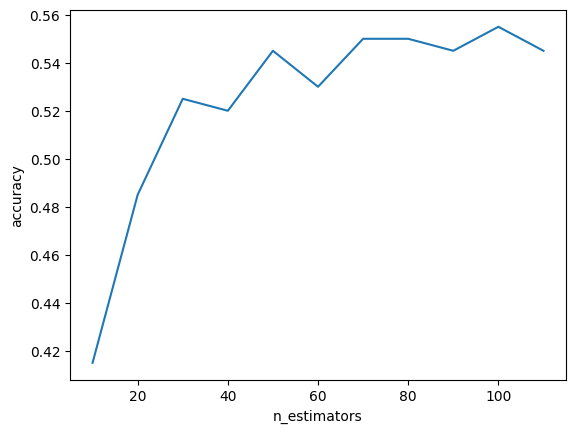

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_acc = []
for k in np.arange(10,120,10):

    rf_classifier = RandomForestClassifier(n_estimators=k, random_state=42)
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Classifier Accuracy for n_estimators =",k, ":", accuracy*100, "%")
    rf_acc.append(accuracy)

xseq = np.linspace(10, 110, 11)
plt.plot(xseq, rf_acc)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()